<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Tipología y ciclo de vida de los datos · PRAC1</p>
<p style="margin: 0; text-align:right;">2017-2 · Máster universitario en Ciencia de datos (Data science)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Práctica 1 Web Scraping
## Beatriz Elena Jaramillo Gallego

In [1]:
#Libraries
#https://github.com/betitajara/Practica

import os
import requests
import csv
import pandas as pd
from datetime import datetime
from datetime import timedelta
from bs4 import BeautifulSoup

#Página web que vamos a hacer el web-scraping
ecoUrl="http://www.eleconomista.es/indice/IBEX-35/historico"

#Función que realiza la extracción
def extract_Ibex(url):
    response= requests.post(url) # hace web-scraping
    soup = BeautifulSoup(response.text,"html.parser") # proceso los datos para leer en listas
    tablehistoricos=soup.find("table",{"class":"tablapeq tablag tablehistoricos"}).find_all('tr')[1:] # a partir del html de 
    #la página se extrae la tabla de interes "class":"tablapeq tablag tablehistoricos"
    elementList=[]
    for row in tablehistoricos:
        cell = [i.text for i in row.find_all('td')]  #los datos estan entre una especie de tabuladores 'td' o 'tr', lo que se hace 
        # aqui es extraer los datos entre estos tabuladores
        elementList.append(cell[0:6])
    elementList=elementList[1:][0:]# Eliminamos el encabezado
    ini_date_list=datetime.strptime(elementList[-1][0],"%d/%m/%y") # Día inicial de la lista (fecha mas antigua)
   
    #En este for se cambia el formato de los datos extraidos, para poder manipularlos correctamente
    for k in range(0,20):
        for i in range(1,6):
            elementList[k][i]=elementList[k][i].replace(".", "")
            elementList[k][i]=elementList[k][i].replace(",", ".")
            elementList[k][i]=float(elementList[k][i])
    return (elementList,ini_date_list) # las variables de salida son los datos y la fecha más antigua de la lista

ini_date='01/01/14' # Fecha inicial de la consulta (fecha mas antigua) dia/mes/año
ini_date=datetime.strptime(ini_date,"%d/%m/%y") #cambio de formato

final_date='11/04/18' # Fecha final de la consulta  dia/mes/año
final_date=datetime.strptime(final_date,"%d/%m/%y")  #cambio de formato

#Lanzamos la consulta con la fecha mas reciente:
# Formato consulta web economista.es: ecoURL+/siguiente/2018-03-11

url=ecoUrl+"/siguiente/"+str(final_date.year)+"-"+str(final_date.month)+"-"+str(final_date.day)

data_Ibex=pd.DataFrame()  # se crea un data frame vacio

#llamamos varias veces la función y luego unimos las listas entre las fechas solicitadas
while True:
    (data_Ibex_aux,ini_date_aux)=extract_Ibex(url)
    data_Ibex_aux=pd.DataFrame(data_Ibex_aux)
    data_Ibex=pd.concat([data_Ibex,data_Ibex_aux])
    final_date_delay = ini_date_aux + timedelta(days=-1)
    url=ecoUrl+"/siguiente/"+str(final_date_delay.year)+"-"+str(final_date_delay.month)+"-"+str(final_date_delay.day)   
    if ini_date_aux<ini_date:
        break
    
# reiniciamos los indices de las filas        
data_Ibex=data_Ibex.reset_index(drop=True)   

#se asignan los encabezados a las variables
data_Ibex.columns =['Fecha', 'Cierre', 'Var (euros)','Var (Porcentaje)','Max','Min']

In [2]:
# mostramos los datos extraidos
data_Ibex

,Fecha,Cierre,Var (euros),Var (Porcentaje),Max,Min
0,11/04/18,9735.8,-27.7,-0.28,9786.3,9717.3
1,10/04/18,9763.5,20.7,0.21,9806.0,9738.7
2,9/04/18,9742.8,60.0,0.62,9790.2,9716.8
3,6/04/18,9682.8,-58.1,-0.60,9734.2,9658.9
4,5/04/18,9740.9,227.6,2.39,9761.8,9616.7
5,4/04/18,9513.3,-36.3,-0.38,9560.4,9417.3
6,3/04/18,9549.6,-50.8,-0.53,9577.5,9500.0
7,29/03/18,9600.4,45.4,0.48,9657.5,9581.7
8,28/03/18,9555.0,81.4,0.86,9555.0,9348.9
9,27/03/18,9473.6,92.6,0.99,9519.2,9441.6


In [3]:
# Guarda datos en CSV:
data_Ibex.to_csv('data_Ibex.csv', index=False)

In [4]:
#analisis descriptivo basico de los datos extraidos
data_Ibex.describe()

,Cierre,Var (euros),Var (Porcentaje),Max,Min
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,10015.767000,0.292455,0.010973,10087.633636,9939.979727
std,869.567251,121.483300,1.248224,865.074267,868.096609
min,7645.500000,-1097.600000,-12.350000,7916.900000,7579.800000
25%,9407.775000,-63.125000,-0.630000,9467.375000,9349.050000
50%,10211.600000,6.750000,0.070000,10279.300000,10138.550000
75%,10595.325000,71.050000,0.690000,10678.700000,10522.475000
max,11866.400000,423.900000,3.870000,11884.600000,11760.800000


In [5]:
# datos que deseamos plotear
x=data_Ibex['Min'] 
y=data_Ibex['Max']
z=data_Ibex['Cierre']

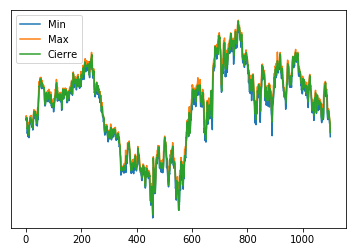

In [7]:
import matplotlib.pyplot as plt
# Creamos una figura
plt.figure()

# Representamos
plt.plot(x,label = 'Min')
plt.plot(y,label = 'Max')
plt.plot(z,label = 'Cierre')
plt.legend()
plt.yticks([])
# Mostramos en pantalla
plt.show()